# Reading Data:

This code is used to train text categorization models. The best model is selected and used to categorize the advertisements by service professionals on the connector application.

In [167]:
import pandas as pd
df = pd.read_excel('adsdatanew.xlsx')
import numpy as np

In [168]:
df.head()

,content,category
0,You need chocolate when life gives you bitter ...,Food and Beverages
1,Instant noode a smart soution for your hunger ...,Food and Beverages
2,Make your purchases using our visa card for se...,Banking Insurance and Financial Services
3,We are the authorize agent to help workers and...,Household and Office Supplies
4,Vacancy announcement for the new recruiment fo...,Recruiment


# Resolving spelling mistakes

In [169]:
df=df.replace('Recruiment','Recruitment') 

# Analyzing data

In [170]:
df.category.value_counts()

category
Engineering and Technology                  221
Sports                                      213
Education                                   212
Banking Insurance and Financial Services    212
Entertainment                               210
Travel and Tourism                          210
Household and Office Supplies               209
Recruitment                                 204
Agriculture                                 201
Construction                                201
Food and Beverages                          200
Health and Medicine                         200
Fashion and Beauty                          200
Machinery and Instruments                   200
Energy and Environment                      200
Arts                                        199
Hotel and Restaurants                       199
Real Estate                                 186
Government and Social Sector                131
Name: count, dtype: int64

In [171]:
for col in df.columns:
    print (col)

content
category


In [172]:
df.columns

Index(['content', 'category'], dtype='object')

# Data visualization

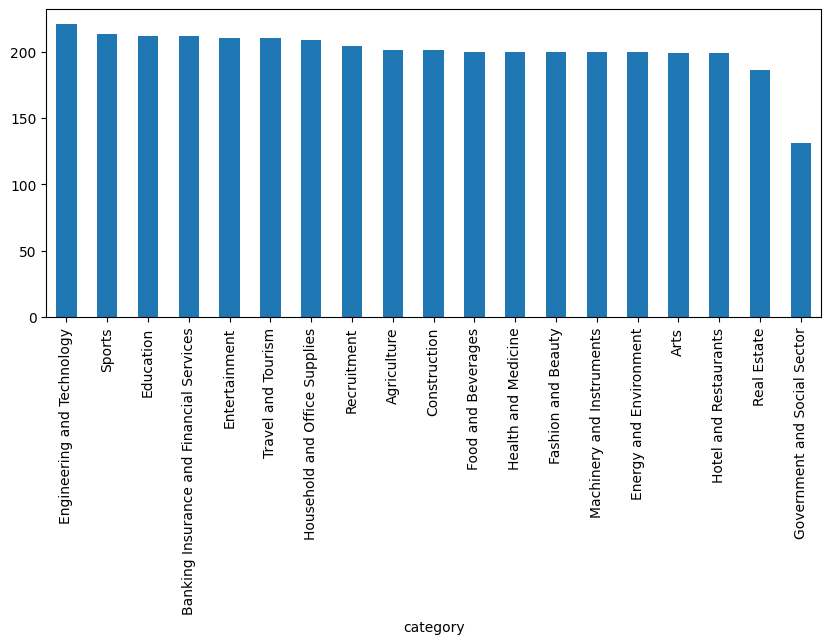

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');

# Data Cleansing

In [174]:
import re
import pandas as pd
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/subashchandrasapkota/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subashchandrasapkota/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Removing Empty Cells

In [175]:

df = df[pd.notnull(df['category'])]

 Total words Count

In [176]:

print('Total words or features:')
print(df['content'].apply(lambda x: len(x.split(' '))).sum())


Total words or features:
43236


## StopWords Removal

In [177]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

STOPWORDS = set(stopwords.words('english'))

In [178]:
#prepare text clean function

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
   ## we dont need text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    



In [179]:
#apply text cleaner
df['content'] = df['content'].apply(clean_text)

In [180]:
## again count total number of features 
print('Total number of words or features:')
print(df['content'].apply(lambda x: len(x.split(' '))).sum())



Total number of words or features:
27784


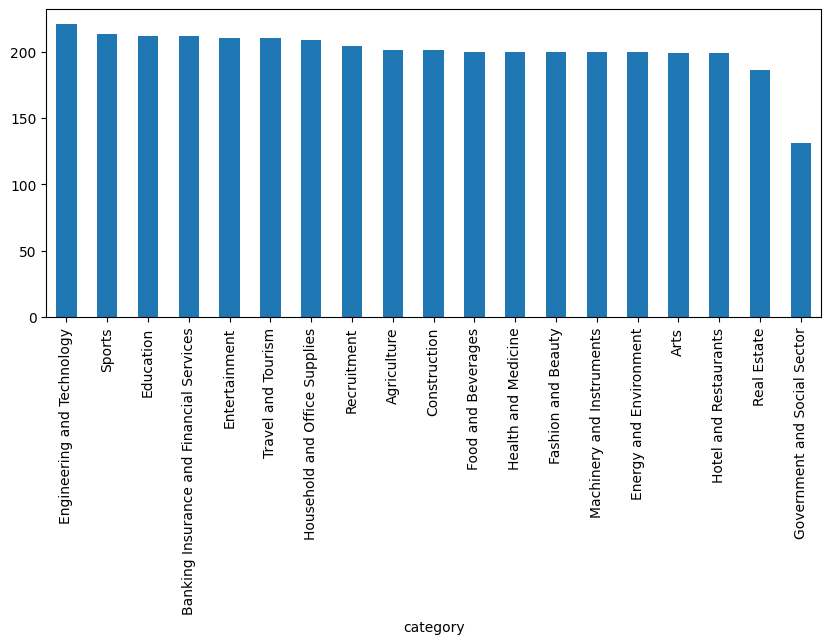

In [181]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');

# Randomize ordering of data

In [182]:
## Step added : 30 sep
# Reorder rows in random order
df_random_order = df.sample(frac=1, random_state=42)  # Setting a random_state for reproducibility

print(df_random_order)

                                                content  \
1011  math techer needed qualifiactionbachelor exper...   
3443  access clean drinking water community safe wat...   
2902                  35 discount different accessories   
897   525 horses working way animal rights could com...   
2293  ourservicescenter diagnostic medicinecenter ne...   
...                                                 ...   
1130  flower vase plants natural decoration house fr...   
1294                       offer laptop limited periods   
860   looking tamato farming contact us different pr...   
3507        invest multifamily properties steady income   
3174        contact us door door delivery kitchen items   

                           category  
1011                      Education  
3443   Government and Social Sector  
2902                   Construction  
897       Machinery and Instruments  
2293            Health and Medicine  
...                             ...  
1130  Household and Offic

# Train Test Split

In [183]:
##split to train and test set 
from sklearn.model_selection import train_test_split

X = df.content
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


In [184]:
X_train

532            farm fresh eggs nutritions health benefits
1507    windproof jacket sale cashback brand offers st...
874                               staff nurse anm gda g4s
2323    buy agricultural tools single places best pric...
2226    weather proof paints enamel decorate homes office
                              ...                        
1130    flower vase plants natural decoration house fr...
1294                         offer laptop limited periods
860     looking tamato farming contact us different pr...
3507          invest multifamily properties steady income
3174          contact us door door delivery kitchen items
Name: content, Length: 2856, dtype: object

# Training Multinomial Naive Bayes Classifier Using SkLearn 

In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix

my_tags = ['Recruitment',
           'Food and Beverages',
           'Fashion and Beauty',
           'Machineries and Instrument',
           'Travel and Tourism',
           'Energy and Environment',
           'Agriculture',
           'Health and Medicine',
           'Constructions',
           'Banking Insurance and Financial Services',
           'Hotel and Restaurants',
           'Education',
           'Entertainment',
           'Sports',
           'Engineering  and Technology',
           'Household and Office Supplies',
           'Machinery and Instruments',
           'Real Estate',
           'Government and Social Sector'
          ]


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=.01)),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print(y_pred)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
['Education' 'Household and Office Supplies' 'Construction'
 'Machinery and Instruments' 'Health and Medicine' 'Travel and Tourism'
 'Travel and Tourism' 'Food and Beverages' 'Construction'
 'Energy and Environment' 'Engineering and Technology' 'Entertainment'
 'Education' 'Engineering and Technology' 'Construction'
 'Hotel and Restaurants' 'Hotel and Restaurants' 'Travel and Tourism'
 'Banking Insurance and Financial Services' 'Hotel and Restaurants'
 'Engineering and Technology' 'Real Estate'
 'Banking Insurance and Financial Services' 'Government and Social Sector'
 'Real Estate' 'Government and Social Sector' 'Entertainment'
 'Energy and Environment' 'Government and Social Sector' 'Real Estate'
 'Sports' 'Banking Insurance and Financial Services' 'Health and Medicine'
 'Machinery and Instruments' 'Hotel and Restaurants' 'Food and Beverages'
 'Arts' 'Government and Social Sector' 'Travel and Tourism'
 'Food and B

# Run Prediction Test

In [186]:
to_predict= ['Hello from the otherside song released today listen']

In [187]:
str1 = ''.join(str(e) for e in to_predict)
str1

'Hello from the otherside song released today listen'

In [188]:
to_predict=clean_text(str1)

In [189]:
nb.predict([to_predict])

array(['Entertainment'], dtype='<U40')

# Serializing the model

In [190]:

import pickle

filename = 'finalized_model.sav'
pickle.dump(nb, open(filename, 'wb'))
 
# some time later...
 


# Loading Serialized Model and Prediction

In [191]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model
result = loaded_model.predict(['Intelligent skin color that supports resilience and radiance'])
print(result)

['Fashion and Beauty']


# Using Logistic Regression and Word2Vec


In [192]:
import gensim

from gensim.models import Word2Vec

## for training my own word2Vec
#wv = Word2Vec(df['content'], vector_size=100, window=5, min_count=1, sg=0)

# using pretrained corpus
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

wv.fill_norms(force=True)

#explore some vocabularies
word_keys = wv.index_to_key
# Slice and print a portion of the vocabulary
start_index = 13030
end_index = 13050
selected_words = word_keys[start_index:end_index]
print(selected_words)


['Memorial_Hospital', 'Seniors', 'memorandum', 'elephant', 'Trump', 'Census', 'pilgrims', 'De', 'Dogs', '###-####_ext', 'chaotic', 'forgive', 'scholar', 'Lottery', 'decreasing', 'Supervisor', 'fundamentally', 'Fitness', 'abundance', 'Hold']


In [193]:
train, test = train_test_split(df, test_size=0.3, random_state = 42)
print(train[0:5])

                                                content  \
1452  new year offer graps chance buy product best p...   
1292  football player good skill required national f...   
2974     looking vaccum cleaner best quality contact us   
3021         outrun voice mail powerful qx4 offroad suv   
2673  perfect gasoline solution vehicles machines cl...   

                           category  
1452             Fashion and Beauty  
1292                    Recruitment  
2974  Household and Office Supplies  
3021      Machinery and Instruments  
2673         Energy and Environment  


In [194]:


#this tokenizes text
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['content']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['content']), axis=1).values

train_tokenized

array([list(['new', 'year', 'offer', 'graps', 'chance', 'buy', 'product', 'best', 'price']),
       list(['football', 'player', 'good', 'skill', 'required', 'national', 'football', 'league']),
       list(['looking', 'vaccum', 'cleaner', 'best', 'quality', 'contact', 'us']),
       ...,
       list(['looking', 'tamato', 'farming', 'contact', 'us', 'different', 'procedure', 'techinques']),
       list(['invest', 'multifamily', 'properties', 'steady', 'income']),
       list(['contact', 'us', 'door', 'door', 'delivery', 'kitchen', 'items'])],
      dtype=object)

In [195]:

def average_word_vectors(model, words):
  """Averages the word vectors for a list of words.

  Args:
    words: A list of words.
    model: A pre-trained Gensim Word2Vec model.

  Returns:
    A numpy array containing the average word vector.
  """

  word_vectors = []
  for word in words:
    try:
      word_vectors.append(model[word])
    except KeyError:
      pass
  if len(word_vectors) == 0:
    return np.zeros(model.vector_size)
  mean = np.sum(word_vectors, axis=0) / len(word_vectors)
  mean = gensim.matutils.unitvec(mean)
  return mean

def word_averaging_list(wv, text_list):
    return np.vstack([average_word_vectors(wv, content) for content in text_list ])


In [196]:
X_train_word_average = word_averaging_list(wv,train_tokenized) #use as train set of post
X_test_word_average = word_averaging_list(wv,test_tokenized)  #use as test set of words
print(X_test_word_average[0:5])

[[ 0.02105572 -0.00033675  0.02761569 ... -0.01839717  0.037233
  -0.06633083]
 [-0.05503479  0.02622235  0.05774777 ... -0.07710731  0.04419231
  -0.03749493]
 [ 0.00598162 -0.0117358  -0.00161481 ... -0.00702783 -0.01772879
   0.02194776]
 [ 0.05795878  0.07731586 -0.00159322 ...  0.07761263 -0.04055938
  -0.03494667]
 [-0.05721525  0.04417159  0.02855938 ...  0.0511131   0.134584
   0.05007625]]


In [197]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5, multi_class='auto', max_iter=1000)
logreg = logreg.fit(X_train_word_average, train['category'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.category))
print(classification_report(test.category, y_pred,target_names=my_tags))

accuracy 0.8941382327209099
                                          precision    recall  f1-score   support

                             Recruitment       0.99      0.96      0.97        70
                      Food and Beverages       0.90      0.93      0.91        57
                      Fashion and Beauty       0.93      0.87      0.90        61
              Machineries and Instrument       0.88      0.86      0.87        66
                      Travel and Tourism       0.79      0.84      0.81        57
                  Energy and Environment       0.91      0.90      0.90        58
                             Agriculture       0.86      0.93      0.90        61
                     Health and Medicine       0.79      0.81      0.80        64
                           Constructions       0.96      0.91      0.93        70
Banking Insurance and Financial Services       0.89      0.91      0.90        64
                   Hotel and Restaurants       0.81      0.81      0.

In [198]:
ah = [w2v_tokenize_text('Nurture yourself with nature kalinchowk tours and travel packages available at affordable prices')] 
wave= word_averaging_list(wv, ah)

In [199]:
logreg.predict(wave)

array(['Travel and Tourism'], dtype=object)